# Visualizing labelled images

In [1]:
import pylab as plt
import cv2
import numpy as np
import skimage.io as skio
import matplotlib
%matplotlib notebook

import json
import os

In [2]:
# Exported labels JSON file:
with open('all_labels_test.json', 'r') as f:
    all_labels = json.load(f)
len(all_labels)

# Image directory (This ipynb is currently executed in a container):
images_root_dir = '/labelling_tool/'

### Functions to return a distinct arbitrary color for each class:

In [3]:
def get_bb_colors(all_labels):
    
    colors = []
    for label in all_labels:
        if label['is_labelled']:
            for bb in label['bbs']:
                colors += [bb['color']]
    colors = list(set(colors))
    
    return colors


def get_random_bb_colors(colors_strs):
    
    plt_colors = np.array(list(matplotlib.colors.cnames.values()))
    
    random_colors_hex = np.random.permutation(plt_colors)[:len(colors_strs)]
    random_colors = list(map(lambda x: matplotlib.colors.hex2color(x), random_colors_hex))
    random_colors = np.array(random_colors)*255
    
    return random_colors


def attribute_rand_hex_color_to_each_bb_class(bb_colors, rand_plt_colors):
    d = {}
    for c_str, c_rgb in zip(bb_colors, rand_plt_colors):
        d[c_str] = c_rgb
    
    return d

bb_colors = get_bb_colors(all_labels)
print(bb_colors)
rand_plt_colors = get_random_bb_colors(bb_colors)
print(rand_plt_colors)
colors_dict = attribute_rand_hex_color_to_each_bb_class(bb_colors, rand_plt_colors)
colors_dict

['pink', 'blue', 'green', 'mediumpurple', 'lime', 'Maroon', 'salmon', 'brown', 'orange']
[[ 100.  149.  237.]
 [  65.  105.  225.]
 [  64.  224.  208.]
 [  25.   25.  112.]
 [   0.  206.  209.]
 [   0.  128.    0.]
 [   0.  255.    0.]
 [ 255.  248.  220.]
 [ 255.  160.  122.]]


{'Maroon': array([   0.,  128.,    0.]),
 'blue': array([  65.,  105.,  225.]),
 'brown': array([ 255.,  248.,  220.]),
 'green': array([  64.,  224.,  208.]),
 'lime': array([   0.,  206.,  209.]),
 'mediumpurple': array([  25.,   25.,  112.]),
 'orange': array([ 255.,  160.,  122.]),
 'pink': array([ 100.,  149.,  237.]),
 'salmon': array([   0.,  255.,    0.])}

### Util functions:

In [4]:
def make_int_tuple(col):
    return (int(col[0]), int(col[1]))

### For each example image, draw the bounding boxes over the image:

/labelling_tool/static/images_to_be_labelled/example_img0.png


<IPython.core.display.Javascript object>


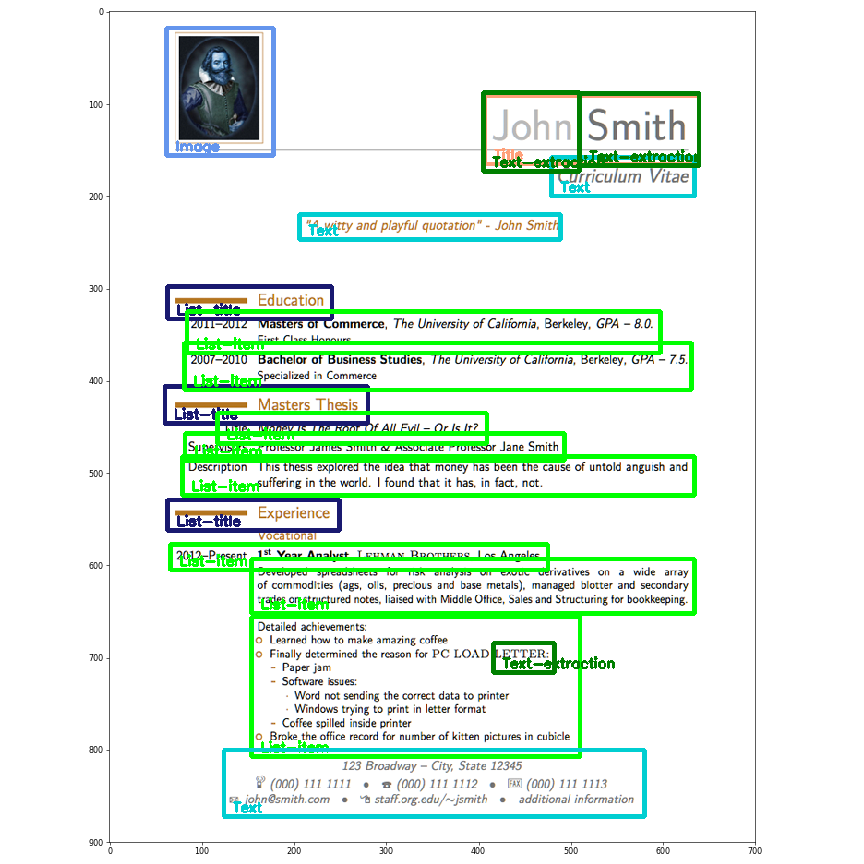

/labelling_tool/static/images_to_be_labelled/example_img1.jpeg


<IPython.core.display.Javascript object>


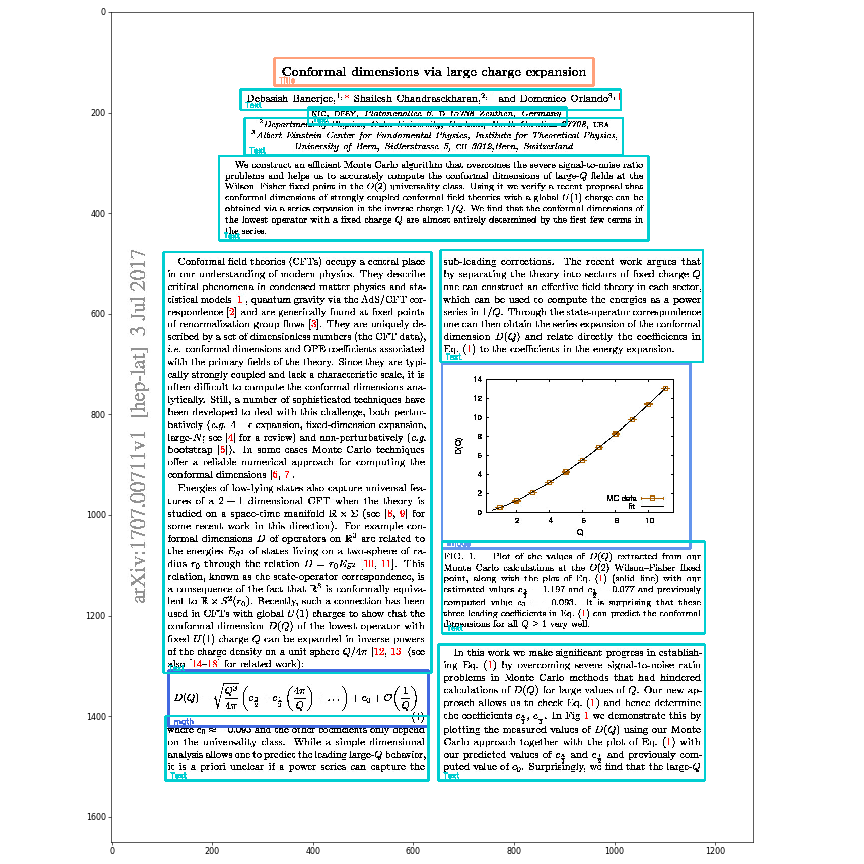

/labelling_tool/static/images_to_be_labelled/example_img2.jpeg


<IPython.core.display.Javascript object>


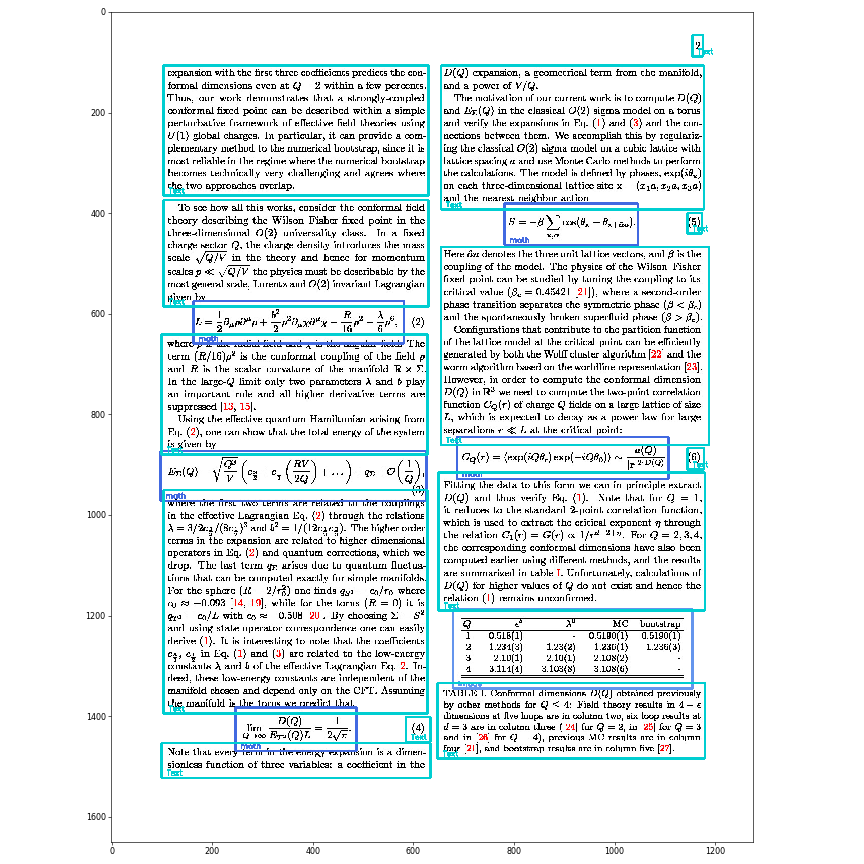

In [5]:
for label in all_labels:
    
    if 'example' in label['img_path']:
        img_path = os.path.join(images_root_dir, label['img_path'])
        print(img_path)
        img = cv2.imread(img_path)

        for bb in label['bbs']:

            label_type = bb['label_type']
            color = colors_dict[bb['color']]
            point_0 = make_int_tuple(bb['point_0'])
            point_1 = make_int_tuple(bb['point_1'])

            cv2.rectangle(img, point_0, point_1, color, thickness=3)
            cv2.putText(img, 
                        bb['label'], 
                        (point_0[0] + 10, point_1[1] - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        color, 
                        thickness=2)

        plt.figure(figsize=(15, 15))
        skio.imshow(img)